# Reactive Molecular Dynamics

# Réactivité du métazachlore

#### Germain Salvato Vallverdu

## 1. Librairies

Ce notebook nécessite les packages :
* [mdtraj](https://www.mdtraj.org/)
* [pymatgen](https://pymatgen.org)
* [nglview](http://nglviewer.org/nglview/latest/)

Les trois peuvent être installé via `pip` ou `conda` en utilisant le canal
`conda-forge`. Les commandes suivantes permettent de créer un environnement 
python et d'installer les modules requis.

```
$ > conda create --name md python=3.9
$ > conda activate md
$ > conda install -n md -c conda-forge pymatgen nglview mdtraj juyter
$ > jupyter-nbextension enable nglview --py --sys-prefix
```

In [1]:
import mdtraj
from pymatgen.core import Molecule
import nglview as nv

import matplotlib.pyplot as plt

## Positions initiales

* Choix et construction du modèle
* Choix de la méthode de simulation

In [2]:
first = Molecule.from_file("../simulations/metazachlore/first.xyz")
view = nv.show_pymatgen(first)
# view.add_label(label_type="serial", color="black")
view

NGLWidget()

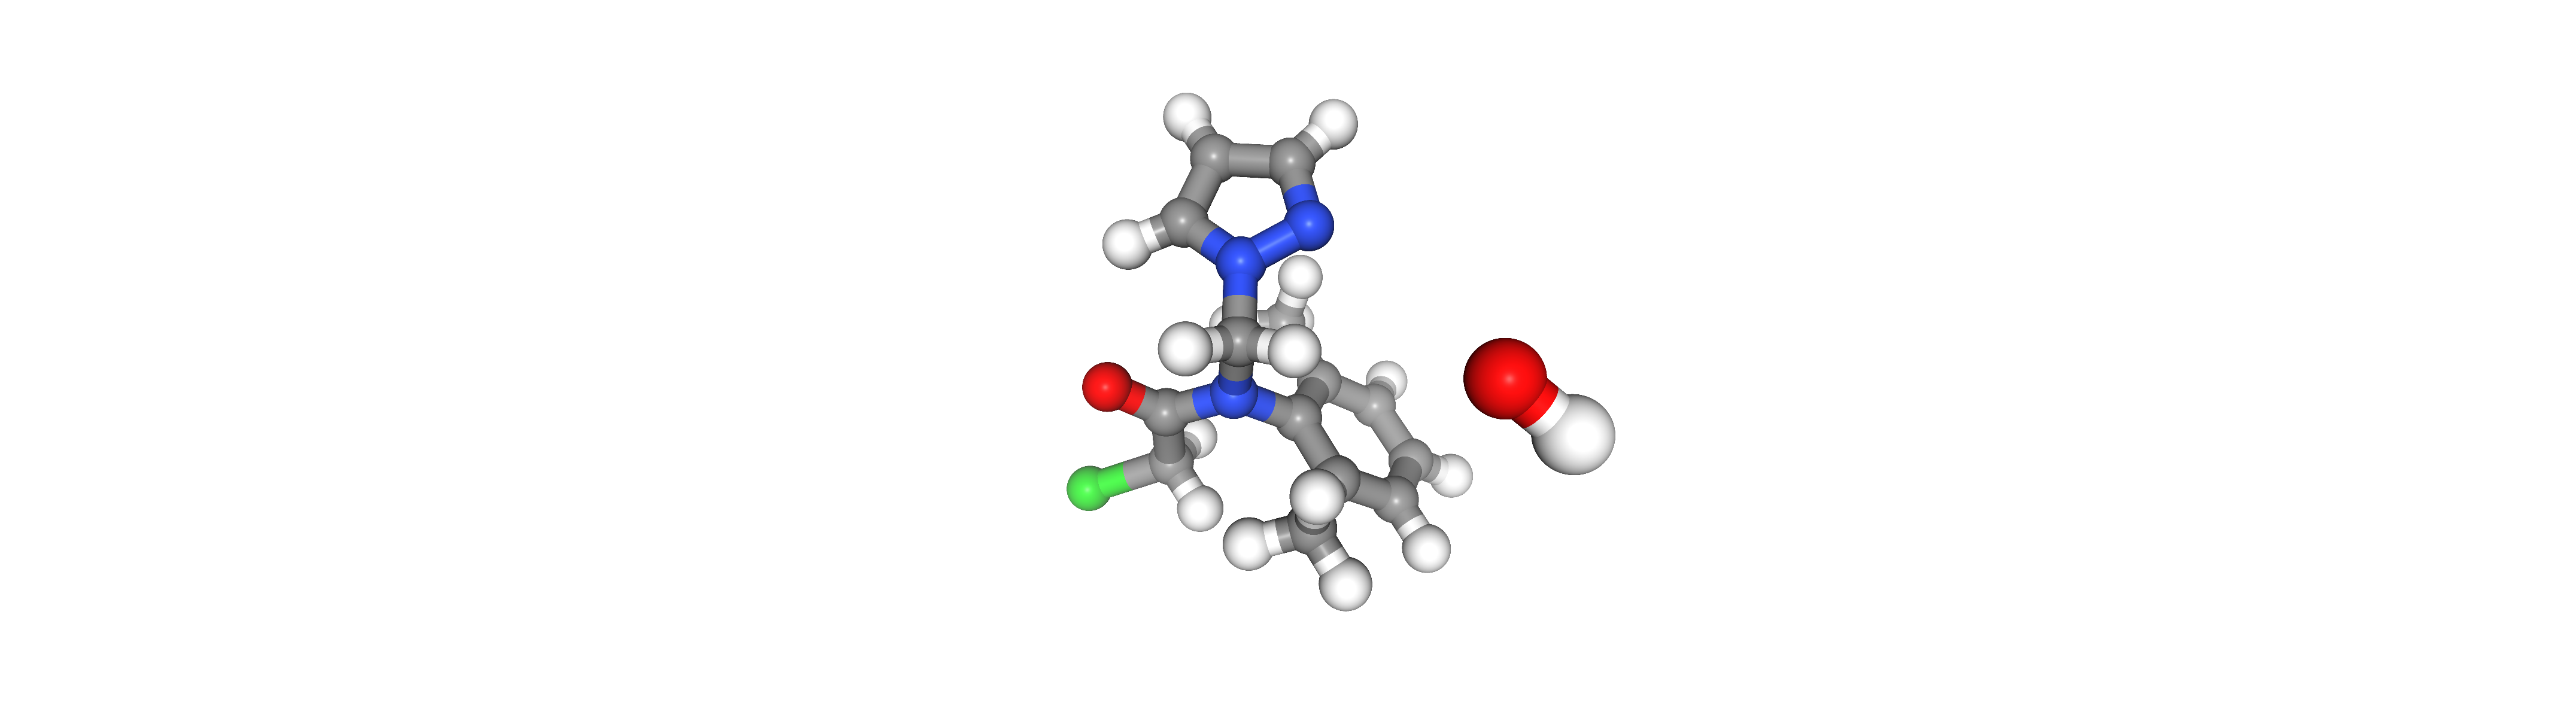

In [4]:
#view.render_image()
view._display_image()

## Simuation

Exécution de la simulation

In [3]:
traj = mdtraj.load_lammpstrj(
    "../simulations/metazachlore/traj.lammpstrj", 
    top="../simulations/metazachlore/first.pdb"
)

In [4]:
view = nv.show_mdtraj(traj)
view

NGLWidget(max_frame=300)

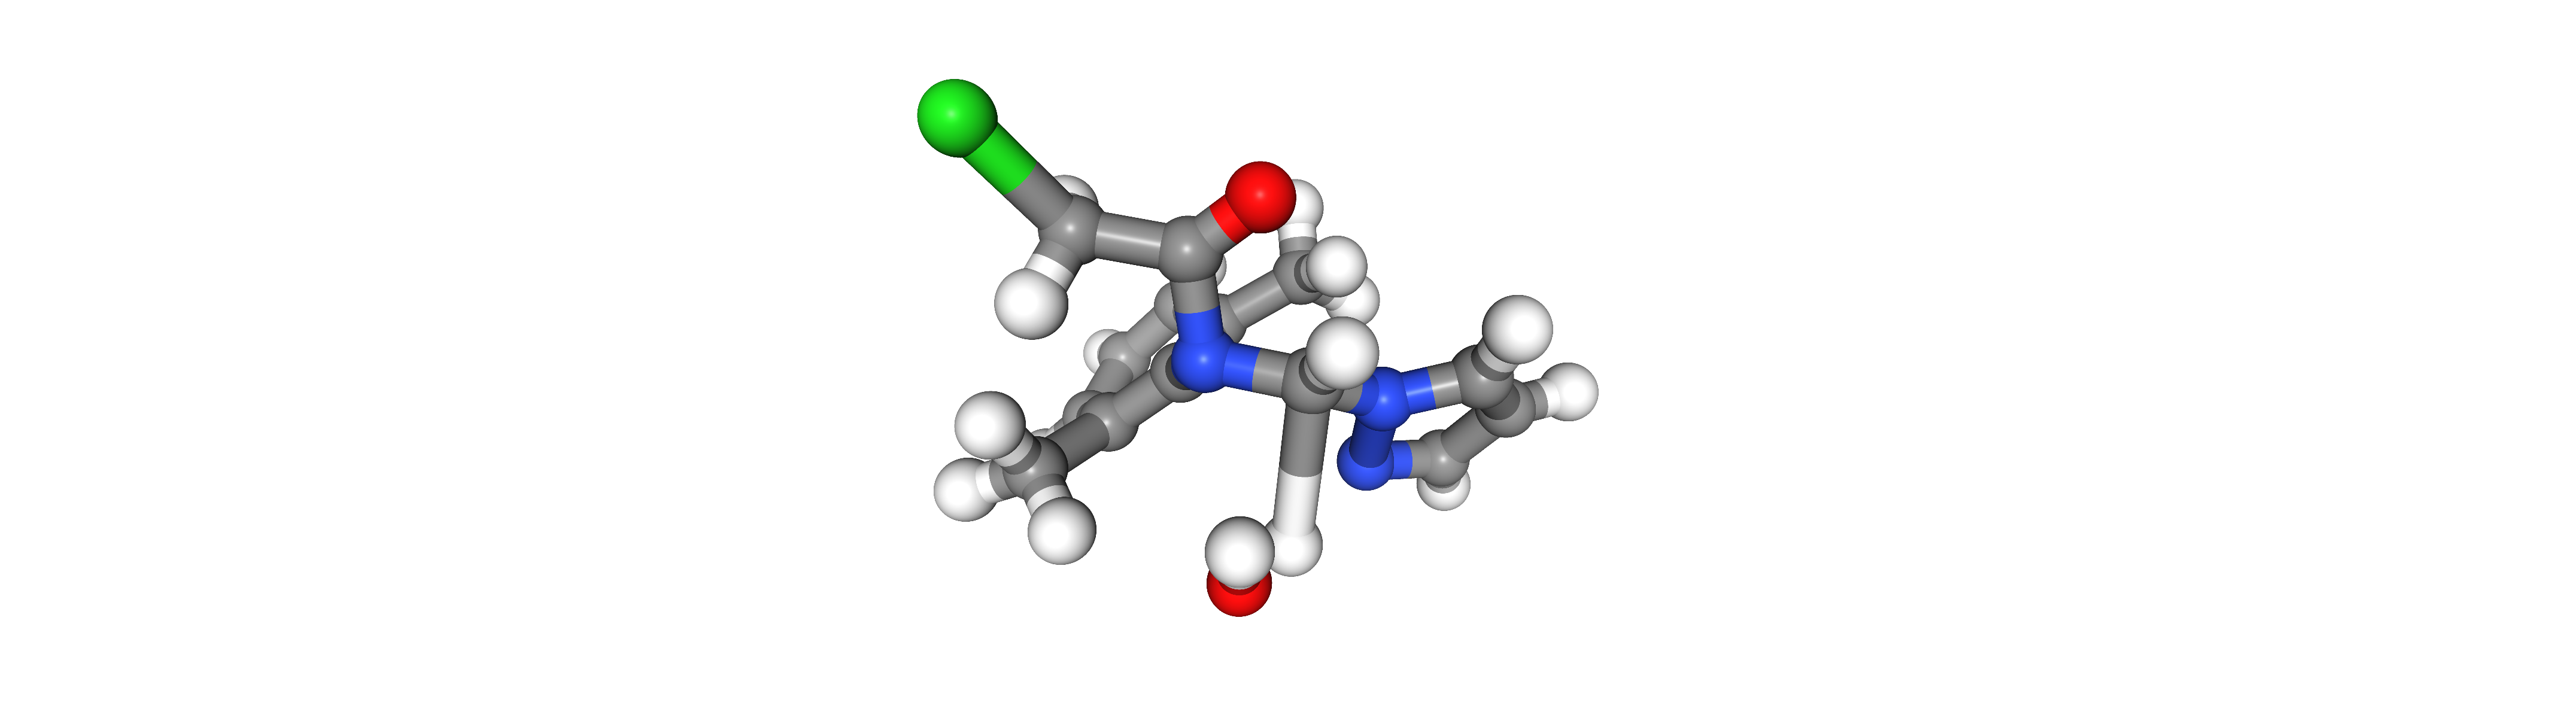

In [8]:
#view.render_image()
view._display_image()

## Analyses

Analyse de la simulation, exemple :

* calculs de distances
* suivi de la formation/rupture de liaisons

In [9]:
distances = mdtraj.compute_distances(
    traj, 
    atom_pairs=[(35, 25), (24, 25)]
)
# Angstrom conversion
distances *= 10

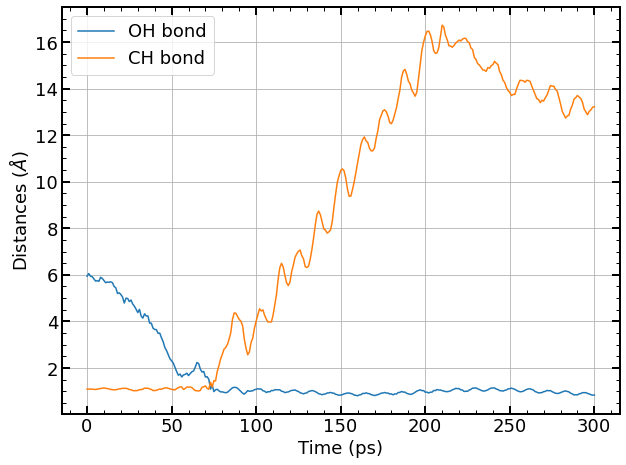

In [10]:
plt.plot(traj.time, distances[:, 0], label="OH bond")
plt.plot(traj.time, distances[:, 1], label="CH bond")
plt.xlabel("Time (ps)")
plt.ylabel("Distances ($\AA$)")
plt.legend();